In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
encoded_value = le.fit_transform(["paris", "paris", "tokyo", "amsterdam"])
print(encoded_value)

In [ ]:
sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])
#display the initial records
sales_data.head()

In [ ]:
# select columns other than 'Opportunity Number','Opportunity Result'cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]
# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = sales_data[cols]
#assigning the Oppurtunity Result column as target
target = sales_data['Opportunity Result']

In [ ]:
sales_data.columns()

In [ ]:
data = sales_data[sales_data.columns.difference(['Opportunity Number','Opportunity Result'])]
target = sales_data['Opportunity Result']

In [ ]:
data.head(n=2)

In [ ]:
data.shape()

In [ ]:
data.shape

In [ ]:
setsdata_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
setsdata_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [ ]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True)

In [ ]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True)

In [ ]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

In [ ]:
sets data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [ ]:
setsdata_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [ ]:
# import the necessary module
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(setsdata_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

In [ ]:
#import the necessary modules
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(setsdata_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))


In [ ]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(setsdata_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

In [ ]:
!pip install pysyindy

In [ ]:
!pip install pysindy

In [ ]:
import numpy as np

import pysindy as ps

In [ ]:
t = np.linspace(0, 1, 100)
x = 3 * np.exp(-2 * t)
y = 0.5 * np.exp(t)
X = np.stack((x, y), axis=-1)  # First column is x, second is y

In [ ]:
model = ps.SINDy(feature_names=["x", "y"])
model.fit(X, t=t)

In [ ]:
model.print()

In [ ]:
x0 = 6
y0 = -0.1

t_test = np.linspace(0, 1, 100)
x_test = x0 * np.exp(-2 * t_test)
y_test = y0 * np.exp(t_test)

sim = model.simulate([x0, y0], t=t_test)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x0, y0, "ro", label="Initial condition", alpha=0.6, markersize=8)
ax.plot(x_test, y_test, "b", label="Exact solution", alpha=0.4, linewidth=4)
ax.plot(sim[:, 0], sim[:, 1], "k--", label="SINDy model", linewidth=3)
ax.set(xlabel="x", ylabel="y")
ax.legend()
fig.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat

import pysindy as ps

In [ ]:
def f(x, t):
    return [
        -0.1 * x[0] + 2 * x[1],
        -2 * x[0] - 0.1 * x[1]
    ]


dt = 0.01
t_train = np.arange(0, 25, dt)
x0_train = [2, 0]
x_train = odeint(f, x0_train, t_train)

In [ ]:
poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_train, t=dt)
model.print()

In [ ]:
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

In [ ]:
def f(x, t):
    return [
        -0.1 * x[0] + 2 * x[1],
        -2 * x[0] - 0.1 * x[1]
    ]


dt = 0.01
t_train = np.arange(0, 25, dt)
x0_train = [2, 0]
x_train = odeint(f, x0_train, t_train)


In [ ]:
poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_train, t=dt)
model.print()

In [ ]:
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

In [ ]:
def linearODE(x, t):
    return [
        -0.5 * x[0] + 4.5 * x[1],
        -4.5 * x[0] - 0.5 * x[1]
    ]


dt = 0.01
t_train = np.arange(0, 25, dt)
x0_train = [2, 0]
x_train = odeint(f, x0_train, t_train)
#print(x_train)

In [ ]:
poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_train, t=dt)
model.print()

In [ ]:
x_sim = model.simulate(x0_train, t_train)

plot_kws = dict(linewidth=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t_train, x_sim[:, 1], "k--")
axs[0].legend()
axs[0].set(xlabel="t", ylabel="$x_k$")

axs[1].plot(x_train[:, 0], x_train[:, 1], "r", label="$x_k$", **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], "k--", label="model", **plot_kws)
axs[1].legend()
axs[1].set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat

import pysindy as ps

In [ ]:
theta_0= np.pi/3

In [ ]:
theta_dot_0=0

In [ ]:
def get_theta_double_dot(theta,theta_dot):
    return -mu*(g/L)*np.sin(theta)

In [ ]:
def theta(t):
    theta= theta_0
    theta_dot=theta_dot_0
    delta_t=0.01
    for time in np.arange(0, t, delta_t):
        theta_double_dot=get_theta_double_dot(
        theta,theta_dot
        )
        theta+= theta_dot*delta_t
        theta_dot+= theta_double_dot*delta_t
    return [theta,theta_dot] 
    

       

In [ ]:
poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(theta1, time)
model.print()

In [ ]:
x_sim = model.simulate(initial_cond, time)

def plot_results(time,theta1,x_sim):
	plt.plot(time, x_sim[:,0])
	plt.plot(time, theta1)

	s = '(Initial Angle = ' + str(initial_angle) + ' degrees)'
	plt.title('Pendulum Motion: ' + s)
	plt.xlabel('time (s)')
	plt.ylabel('angle (rad)')
	plt.grid(True)
	plt.legend(['linear', 'model'], loc='lower right')
	plt.show()
    
    
plot_results(time, theta2, x_sim)

In [ ]:
import numpy as np 
from numpy import sin, cos
from scipy.integrate import odeint
from matplotlib import pyplot as plt 


# define the equations
def equations(y0, t):
	theta, x = y0
	f = [x, -(g/l) * sin(theta)]
	return f

def plot_results(time,theta2,x_sim):
	plt.plot(time, x_sim[:,0])
	plt.plot(time, theta2)

	s = '(Initial Angle = ' + str(initial_angle) + ' degrees)'
	plt.title('Pendulum Motion: ' + s)
	plt.xlabel('time (s)')
	plt.ylabel('angle (rad)')
	plt.grid(True)
	plt.legend(['nonlinear', 'model'], loc='lower right')
	plt.show()

# parameters
g = 9.81
l = 1.0
dt=0.01

time = np.arange(0, 25, dt)

# initial conditions
initial_angle = 130.0
theta0 = np.radians(initial_angle)
x0 = np.radians(0.0)

# find the solution to the nonlinear problem
theta1 = odeint(equations, [theta0, x0],  time)

# find the solution to the linear problem
#w = np.sqrt(g/l)
#theta2 = [theta0 * cos(w*t) for t in time]

In [ ]:
poly_order = 5
threshold = 0.05

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(theta1, time)
model.print()
xnl_train = [theta0, 0]
x_sim = model.simulate(xnl_train, time)
# plot the results
plot_results(time, theta2, x_sim)

In [ ]:
for i in range(1, t_train.size):
    t = (i - 1) * dt
    y = x0_train
    ys = [x0+noise,x1]

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

num_sims = 5  # Display five runs

t_init = 3
t_end  = 7
N      = 1000  # Compute 1000 grid points
dt     = float(t_end - t_init) / N
y_init = 0

c_theta = 0.7
c_mu    = 1.5
c_sigma = 0.06

def mu(y, t):
    """Implement the Ornstein–Uhlenbeck mu."""  # = \theta (\mu-Y_t)
    return c_theta * (c_mu - y)

def sigma(y, t):
    """Implement the Ornstein–Uhlenbeck sigma."""  # = \sigma
    return c_sigma

def dW(delta_t):
    """Sample a random number at each call."""
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

ts = np.arange(t_init, t_end + dt, dt)
ys = np.zeros(N + 1)

ys[0] = y_init

for i in range(1, ts.size):
    t = (i - 1) * dt
    y = ys[i - 1]
    ys[i] = y + mu(y, t) * dt + sigma(y, t) * dW(dt)

        
plt.plot(ts, ys)
plt.xlabel("time (s)")
h = plt.ylabel("y")
h.set_rotation(0)
plt.show()

In [ ]:
#Params
g = 9.81
l = 1.0
time = np.arange(0, 10.0, 0.025)

#initial conditions
theta0 = 2
x0 = np.radians(0.0)

#Linear
w = np.sqrt(g/l)
theta2 = [theta0 * np.cos(w*t) for t in time]


plt.plot(time, theta2)
plt.xlabel('time (s)')
plt.ylabel('angle (rad)')
plt.show()



In [ ]:
g=-9
l=3
initial_cond=[2.00,0.00]



def dataGen(t):
    theta= initial_cond[0]
    theta_dot=initial_cond[1]
    dt=0.01
    z=np.empty((2500, 2))
    for time in np.arange(0, t, dt):
        i=0
        x=[(theta) + (dt)*(theta_dot) + np.sqrt(dt)*(0.0)*(np.random.randn()),
           theta_dot + (dt)*((-g/l)*theta)]
        theta=z[i][0]
        theta_dot=z[i][1]
        i+=1
        return z
    x_data_noise=dataGen(25)
print(x_data_noise)

plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10, 4))
axs[1].plot(x_data_noise[:, 0], x_data_noise[:, 1], 'r-', label="$x_k$", color='r', **plot_kws)
axs[1].set(title='Training data', xlabel='$Angle(theta)$', ylabel='$ Angular Velocity (Omega) $')
axs[1].legend(loc="best")
fig.tight_layout
fig.show()

In [ ]:
#sqrt(dt)*(sigma)*(randn)
#noise = noise_level * np.random.randn(*x_train.shape)
def linearSHM(x, t):
    return [
        -0.2 * x[0] + 3 * x[1],
        -3 * x[0] - 0.2 * x[1]
    ]


dt = 0.01
computations = np.arange(0, 25, dt)
initial_con = [2, 0]
x_data = odeint(linearSHM, initial_con, computations)
print(x_data.shape)

In [ ]:
dt = 0.01
t_train = np.arange(0, 25, dt)
z= [2, 0]

def linearODE(x, t):

      return  [-0.1 * x[0] + 2 * x[1],
               -2 * x[0] - 0.1 * x[1]
              ] 

x_train = odeint(linearODE, z, t_train)
x_train_noisy = x_train + noise_level * np.random.rand(*x_train.shape)
print(x_train)

In [ ]:
rows, cols = (2500, 2) 
arr=[] 
for i in range(cols): 
    col = [] 
    for j in range(rows): 
        col.append(0) 
    arr.append(col) 
print(arr)  
  

In [ ]:
x=[(dt)*(-.2)*theta + (dt)*((3)*theta_dot) + np.sqrt(dt)*(0.0)*(np.random.randn()),
           (dt)*(-.2)*theta_dot + (dt)*((-g/l)*theta)]
        i=0
        z[i][0]=theta
        z[i][1]=theta_dot
        i+=1


In [75]:
g=-9
l=3
initial_cond=[2,0]

def dataGen1(t):
    theta= initial_cond[0]
    theta_dot=initial_cond[1]
    dt=0.01
    x=np.empty([2500, 2])
    for time in np.arange(0, t, dt):
        x0=(-.2)*(theta) + (dt)*(theta_dot) 
        x1=(-.2)*(theta_dot) + (dt)*((-g/l)*theta)
        theta=x0
        theta_dot=x1
        return theta,theta_dot 
        

In [76]:
#np.set_printoptions(formatter={'float_kind':'{:f}'.format})
x_data_noise=dataGen1(25)
print(x_data_noise)

(-0.4, 0.06)


In [1]:
computations = np.arange(0, 25, 0.01)


plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10, 4))
axs[0].plot(computations, x_data_noise[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(computations, x_data_noise[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].legend(loc="best")
axs[0].set(xlabel="$time (seconds)$", ylabel="$x_k$")

axs[1].plot(x_data_noise[:, 0], x_data_noise[:, 1], 'r-', label="$x_k$", color='r', **plot_kws)
axs[1].set(title='Training data', xlabel='$Angle(theta)$', ylabel='$ Angular Velocity (Omega) $')
axs[1].legend(loc="best")
fig.tight_layout
fig.show()

NameError: name 'np' is not defined

In [ ]:
% Usher-McClelland (LCA) model - linear input-output version
% Note the fast dynamics along the phase space diagonal before deciding
% (clue to 1-D approximation of DDM)
% Note also that I have balanced the leak k and inhibition b so that they
% are the same; and that both have high values - these 2 conditions are
% necessary to approximate to DDM


% Model parameters 
S1=4; % Stimulus input amplitude to y1
S2=4; % Stimulus input amplitude to y2
b=7; % Mutual inhibitory coupling strength between the y's
k=7; % Rate of decay of the y's
z=1; % Decision threshold
c=0.1; % Size of the noise


% Initializing the y's
y1(1)=0;
y2(1)=0;

%Define time for the "for" loop
Trial_total=1000 ; % Total number of trial; you should try varying this
T_Total=1000; % Total time
dt=0.1; % Time step

% Starting the trial "for" loop
for i= 1:Trial_total
    
% Starting the time "for" loop
    for t=1:T_Total/dt
        
        y1(t+1)=y1(t)+dt*(-k*y1(t)-b*y2(t)+S1)+ c*sqrt(dt)*randn;
        y2(t+1)=y2(t)+dt*(-k*y2(t)-b*y1(t)+S1)+ c*sqrt(dt)*randn;
        
    end;
    % Plot in phase (y1,y2) space
    plot(y1,y2); title('Trajectory of network in phase space'); 
    xlabel('y_1'); ylabel('y_2'); 
    hold on;
end;

% Check whether total number of correct and error trials adds up to
% Trial_total i.e. consistent
disp('Total number of trials is')
if (size(DTc,2)+size(DTe,2))==Trial_total
    disp('consistent')
end;

% Calculate the accuracy (Divide the number of correct trials with the
% total number of trials
disp('Accuracy')
size(DTc,2)/(size(DTc,2)+size(DTe,2)) % Total number of trials
% Note: Can also be size(DTc,2)/Trial_total

% Display reaction/decision time distributions (good only for large number
% of trials e.g. Trial_total=10000)
figure; hist(DTc,30); title('Correct DT distribution');
figure; hist(DTe,30); title('Error DT distribution')

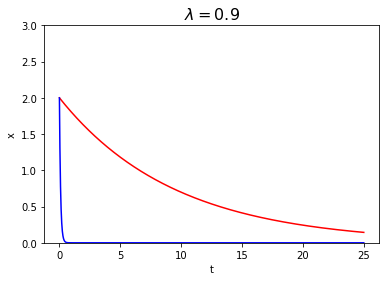

In [34]:
# parameters
lam = 0.9
T = 25      # total Time duration in steps
x0 = 2     # initial condition of x at time 0
y0= 0 
dt=0.01

# initiatialize variables
t = np.arange(0, T, dt)
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0
y[0] = y0

# Step through in time
for k in range(len(t)-1):
    x[k+1] = lam * x[k] + (dt)* -y[k]
    y[k+1] = y[k]*dt+ dt*-3*x[k]

# plot x as it evolves in time
fig = plt.figure()
plt.title('$\lambda=%0.1f$' % lam, fontsize=16)
plt.plot(t, x0 * lam**t, 'r') # analytic solution
plt.plot(t, x, 'b-')          # simulated data pts
plt.ylim(0, x0+1)

plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [35]:
# parameters
lam = 0.9
T = 25      # total Time duration in steps
x0 = 2     # initial condition of x at time 0
y0= 0 
dt=0.01

# initiatialize variables
t = np.arange(0, T, dt)
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0
y[0] = y0

# Step through in time
for k in range(len(t)-1):
    x[k+1] = dt* x[k] + lam *dt* -y[k]
    y[k+1] = -y[k]*dt+ dt*-3*x[k]
    print(x[k],y[k])
    


2.0 0.0
0.02 -0.06
0.00074 0.0
7.4e-06 -2.2199999999999998e-05
2.7380000000000003e-07 -2.6469779601696886e-23
2.7380000000000007e-09 -8.214e-09
1.0130600000000003e-10 -1.2924697071141057e-26
1.0130600000000005e-12 -3.0391800000000008e-12
3.7483220000000015e-14 -6.310887241768095e-30
3.748322000000002e-16 -1.1244966000000004e-15
1.3868791400000007e-17 -1.5407439555097887e-33
1.386879140000001e-19 -4.160637420000002e-19
5.131452818000003e-21 -7.52316384526264e-37
5.131452818000004e-23 -1.539435845400001e-22
1.8986375426600016e-24 0.0
1.8986375426600016e-26 -5.695912627980005e-26
7.024958907842007e-28 8.96831017167883e-44
7.024958907842005e-30 -2.107487672352602e-29
2.5992347959015425e-31 4.3790577010150533e-47
2.5992347959015424e-33 -7.797704387704627e-33
9.617168744835707e-35 0.0
9.617168744835707e-37 -2.885150623450712e-36
3.558352435589212e-38 0.0
3.558352435589212e-40 -1.0675057306767636e-39
1.3165904011680084e-41 1.2744735289059618e-57
1.3165904011680083e-43 -3.949771203504025e-43
4

0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0.0
0.0 0.0
0.0 -0

In [51]:
g=9        #gravity aprrox
l=3         #pendulum length
lam = 0.2   #decay 
c = 0.5    #noise
T = 25      #total Time duration in steps
x0 = 2     #initial condition of x at time 0
y0= 0      #initial condition of y at time 0
dt=0.01    #timestep

# initiatialize variables
t = np.arange(0, T, dt)
x = np.zeros_like(t)
y = np.zeros_like(t)
x[0] = x0  #theta
y[0] = y0  #theta_dot

# Step through in time
for k in range(len(t)-1):
    x[k+1] = x[k]+dt*(-lam*x[k] + 3*y[k]) + np.sqrt(dt)*(c)*(np.random.randn())
    y[k+1] = y[k]+dt*(-lam*y[k] + (-g/l)*x[k])
    #print(x[k],y[k])

    
#fit to array    
x_data_1= np.vstack((x, y)).T
print(x_data_1)

[[ 2.          0.        ]
 [ 1.97891635 -0.06      ]
 [ 1.98554487 -0.11924749]
 ...
 [ 0.35121828  1.05812957]
 [ 0.49556838  1.04547676]
 [ 0.49838867  1.02851876]]


In [60]:
poly_order = 1
threshold = 0.01

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model.fit(x_data_1, t=dt)
model.print()

x0' = 0.027 1 + 0.072 x0 + 3.033 x1
x1' = -2.999 x0 + -0.154 x1


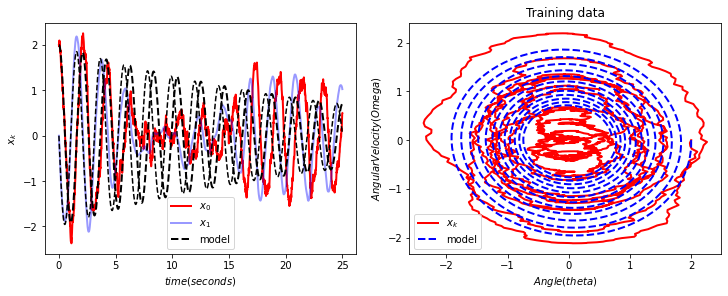

In [61]:
initial_con_1 = [2,0]
x_sim = model.simulate(initial_con_1, t)


plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 2, constrained_layout=True,figsize=(10, 4))
axs[0].plot(t, x_data_1[:, 0], "r", label="$x_0$", **plot_kws)
axs[0].plot(t, x_data_1[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
axs[0].plot(t, x_sim[:, 0], "k--", label="model", **plot_kws)
axs[0].plot(t, x_sim[:, 1], "k--")
axs[0].legend(loc="best")
axs[0].set(xlabel="$time (seconds)$", ylabel="$x_k$")

axs[1].plot(x_data_1[:, 0], x_data_1[:, 1], 'r-', label="$x_k$", color='r', **plot_kws)
axs[1].plot(x_sim[:, 0], x_sim[:, 1], 'b--', label="model", color='b', **plot_kws)
axs[1].set(title='Training data', xlabel='$Angle(theta)$', ylabel='$ Angular Velocity (Omega) $')
axs[1].legend(loc="best")
fig.tight_layout
fig.show()